In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("loan_approval_dataset.csv")

# Display the first 5 rows
print(df.shape)
print(df.head())


(4269, 13)
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0              

In [7]:
df.drop("loan_id", axis=1, inplace=True)

In [9]:
from sklearn.impute import SimpleImputer

# Fill missing values with most frequent (mode) for simplicity
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode all object type columns
for col in df_imputed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_imputed[col] = le.fit_transform(df_imputed[col])


In [26]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df_imputed.drop(" loan_status", axis=1)
y = df_imputed[" loan_status"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)


In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print("=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred_lr))

print("=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_dt))


=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       536
           1       0.85      0.91      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854

=== Decision Tree Report ===
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.98      0.98      0.98       318

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.99      0.99      0.99       854



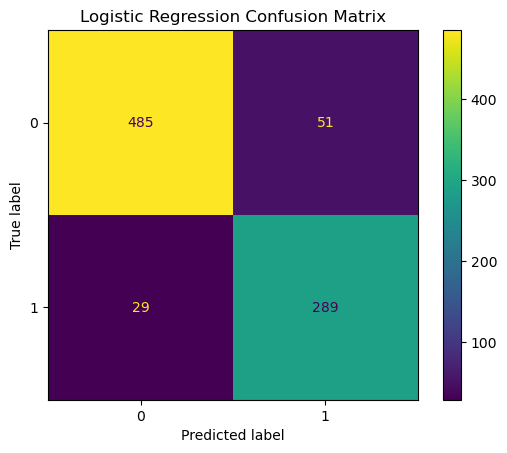

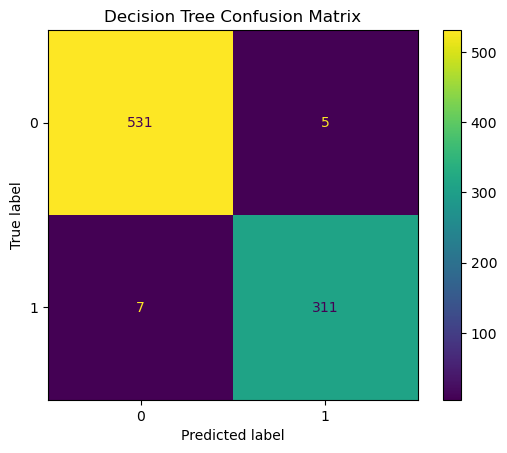

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()
